<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Hyperparameter Tuning

## *Data Science Unit 4 Sprint 2 Assignment 4*

## Your Mission, should you choose to accept it...

To hyperparameter tune and extract every ounce of accuracy out of this telecom customer churn dataset: <https://lambdaschool-data-science.s3.amazonaws.com/telco-churn/WA_Fn-UseC_-Telco-Customer-Churn+(1).csv> 

## Requirements

- Load the data
- Clean the data if necessary (it will be)
- Create and fit a baseline Keras MLP model to the data.
- Hyperparameter tune (at least) the following parameters:
 - batch_size
 - training epochs
 - optimizer
 - learning rate (if applicable to optimizer)
 - momentum (if applicable to optimizer)
 - activation functions
 - network weight initialization
 - dropout regularization
 - number of neurons in the hidden layer
 
 You must use Grid Search and Cross Validation for your initial pass of the above hyperparameters
 
 Try and get the maximum accuracy possible out of this data! You'll save big telecoms millions! Doesn't that sound great?


In [376]:
"""
Import Statement:
"""

import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [377]:
pwd

'/Users/jorge/Unit 4 DS 10/DS-Unit-4-Sprint-2-Neural-Networks/module4-Hyperparameter-Tuning'

In [378]:
df = pd.read_csv("./data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.shape

(7043, 21)

In [379]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [380]:
df.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [381]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [382]:
df.describe(exclude='number')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,1918-ZBFQJ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [383]:
df.describe(exclude='number').columns.values

array(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges', 'Churn'], dtype=object)

In [384]:
df.fillna(0, inplace=True)
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df1 = handle_non_numerical_data(df)
print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        6699       0              0        0           1       1   
1         502       1              0        1           1      34   
2        6869       1              0        1           1       2   
3        1976       1              0        1           1      45   
4        3676       0              0        1           1       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             1              2                0               2  ...   
1             0              1                0               1  ...   
2             0              1                0               1  ...   
3             1              2                0               1  ...   
4             0              1                2               2  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 2            2            2                2         0   


In [385]:
# Removing column
list_drop = ['customerID','TotalCharges']
df1.drop(list_drop, axis=1, inplace=True)
print(df1.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')


In [386]:
X = df.drop('Churn', axis='columns').values
y = df.Churn.values

In [387]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3)

In [388]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [389]:
means = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = X_train - means
X_train = X_train / std

X_test = X_test - means
X_test = X_test / std

In [390]:
#Create Model
model = Sequential()
#Input => Hidden
model.add(Dense(16, input_dim=18, activation='relu'))
#Hidden
model.add(Dense(16, activation='relu'))
#Output
model.add(Dense(1, activation='linear'))
#Compile
model.compile(loss='binary_crossentropy', optimizer='nadam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_172 (Dense)            (None, 16)                304       
_________________________________________________________________
dense_173 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_174 (Dense)            (None, 1)                 17        
Total params: 593
Trainable params: 593
Non-trainable params: 0
_________________________________________________________________


In [391]:
history = model.fit(X_train, y_train, epochs=20, validation_split = .1, verbose=0)

In [392]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


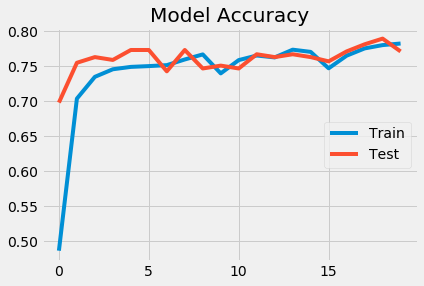

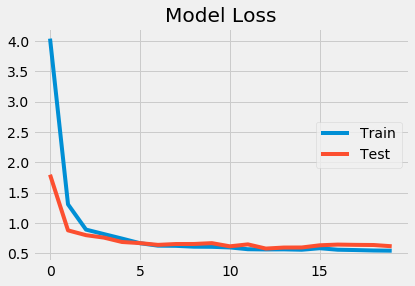

In [394]:
# Plot training & validation accuracy values
# Plot training & validation loss values
plt.style.use('fivethirtyeight')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

plt.style.use('fivethirtyeight')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

In [395]:
%%time

# Function to create model, required for KerasClassifier
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=18, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation="sigmoid"))
    # Compile the model 
    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
param_grid = {'batch_size': [10, 20, 40, 60, 80, 100],
              'epochs': [20]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

/Users/jorge/opt/anaconda3/envs/U4-S1-NLP-DS10/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best: 0.8010790927173501 using {'batch_size': 60, 'epochs': 20}
Means: 0.7998012340866029, Stdev: 0.0019053469881476427 with: {'batch_size': 10, 'epochs': 20}
Means: 0.7995172504943389, Stdev: 0.0028727473563847964 with: {'batch_size': 20, 'epochs': 20}
Means: 0.7884424165384211, Stdev: 0.00433184323568309 with: {'batch_size': 40, 'epochs': 20}
Means: 0.8010790927173501, Stdev: 0.0032780542912210584 with: {'batch_size': 60, 'epochs': 20}
Means: 0.798949314648161, Stdev: 0.00520755154727092 with: {'batch_size': 80, 'epochs': 20}
Means: 0.7992332863245738, Stdev: 0.00141181897782836 with: {'batch_size': 100, 'epochs': 20}
CPU times: user 1min 55s, sys: 17.7 s, total: 2min 12s
Wall time: 1min 27s


 ### Stretch Goals:
  
- Try to implement Random Search Hyperparameter Tuning on this dataset
- Try to implement Bayesian Optimiation tuning on this dataset using hyperas or hyperopt (if you're brave)
- Practice hyperparameter tuning other datasets that we have looked at. How high can you get MNIST? Above 99%?
- Study for the Sprint Challenge
- Can you implement both perceptron and MLP models from scratch with forward and backpropagation?
- Can you implement both perceptron and MLP models in keras and tune their hyperparameters with cross validation?